Importing the libraries that we want

In [42]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [98]:
df = pd.read_csv("/content/2024 18031 - Mutual_fund Data - 2024 18031 - Mutual_fund Data.csv")
df.head()

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51%,28.32,37.79%,20.29%,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25%,24.89,46.08%,21.93%,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94%,35.11,54.46%,27.48%,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37%,21.40,59.79%,0,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06%,23.69,32.07%,15.18%,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High


## Understanding the data

In [22]:
df.columns

Index(['AMC', 'Fund Name', 'Morning star rating', 'Value Research rating',
       '1 month return', 'NAV', '1 Year return', '3 Year Return',
       'Minimum investment', 'Fund Manager', 'AUM', 'Category', 'Risk'],
      dtype='object')

we can drop teh AUM as it matters the least

how many rows we are dealing with


In [23]:
print(df.size)
print(df.shape)

18109
(1393, 13)


this just describes our dataset


In [24]:
print(df.describe)

<bound method NDFrame.describe of                                 AMC                                Fund Name  \
0     mahindra manulife mutual fund  Mahindra Manulife Large & Mid Cap Reg-G   
1     mahindra manulife mutual fund      Mahindra Manulife Consumption Reg-G   
2     mahindra manulife mutual fund          Mahindra Manulife Mid Cap Reg-G   
3     mahindra manulife mutual fund        Mahindra Manulife Small Cap Reg-G   
4     mahindra manulife mutual fund        Mahindra Manulife Large Cap Reg-G   
...                             ...                                      ...   
1388                lic mutual fund                   LIC MF Multi Cap Reg-G   
1389                lic mutual fund                       LIC MF Large Cap-G   
1390                lic mutual fund             LIC MF Large & Mid Cap Reg-G   
1391                lic mutual fund                  LIC MF Infrastructure-G   
1392                lic mutual fund          LIC MF Balanced Advantage Reg-G   

     

finding how many null values we have


In [25]:
df.isnull().sum()

,0
AMC,0
Fund Name,0
Morning star rating,0
Value Research rating,0
1 month return,0
NAV,0
1 Year return,0
3 Year Return,0
Minimum investment,0
Fund Manager,39


seeing the type of data we are dealing with


most of these have pecentage sign thats why they are showing as object even though they are numercial data type, we will remove the percentage sign to make them numerical
and the minimum investment feature has RS...character in it

In [26]:
df.dtypes

,0
AMC,object
Fund Name,object
Morning star rating,int64
Value Research rating,int64
1 month return,object
NAV,float64
1 Year return,object
3 Year Return,object
Minimum investment,object
Fund Manager,object


now we want to know that if there are any duplicate  rows in our dataset and removing them if there are any

In [99]:
pattern1 = r'[%]'
pattern2 = r'[Rs.]'
df['1 month return'] = pd.to_numeric(df['1 month return'].str.replace(pattern1, '', regex=True), errors='coerce').astype('int')  # Convert to integer
df['1 Year return'] = pd.to_numeric(df['1 Year return'].str.replace(pattern1, '', regex=True), errors='coerce').astype('int')  # Convert to integer
df['3 Year Return'] = pd.to_numeric(df['3 Year Return'].str.replace(pattern1, '', regex=True), errors='coerce').astype('int')  # Convert to integer
df['Minimum investment'] = pd.to_numeric(df['Minimum investment'].str.replace(pattern1, '', regex=True), errors='coerce').astype('float')  # Convert to integer

now we have converted the type of data to get the requires one

In [31]:
df.dtypes

,0
AMC,object
Fund Name,object
Morning star rating,int64
Value Research rating,int64
1 month return,int64
NAV,float64
1 Year return,int64
3 Year Return,int64
Minimum investment,float64
Fund Manager,object


Dropping the AMC coloumn cause it might not be that useful in prediction

In [100]:
df.drop('AMC', axis = 1, inplace=True)

In [72]:
duplicate_rows = df[df.duplicated()]
print(f"no. of duplicates: {duplicate_rows.shape[0]}")

if duplicate_rows.shape[0] > 0:
    print("Duplicates found:")
    print(duplicate_rows.head())
else:
    print("No duplicate rows found.")


no. of duplicates: 0
No duplicate rows found.


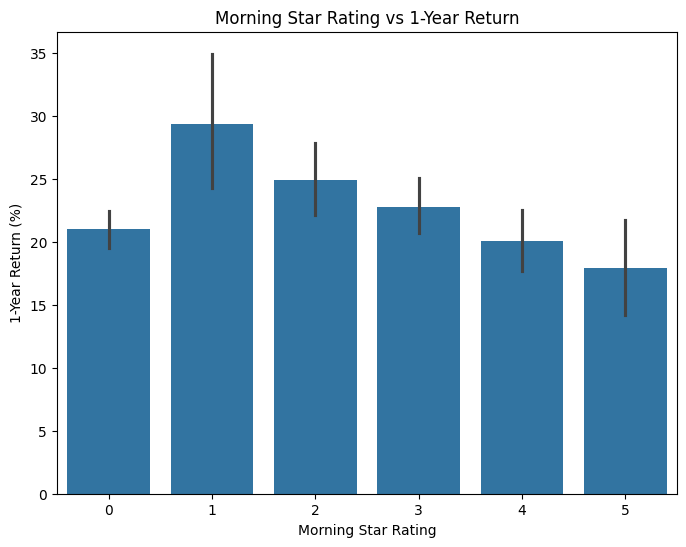

In [101]:
plt.figure(figsize=(8,6))
sns.barplot(x='Morning star rating', y='1 Year return', data=df)
plt.title('Morning Star Rating vs 1-Year Return')
plt.xlabel('Morning Star Rating')
plt.ylabel('1-Year Return (%)')
plt.show()

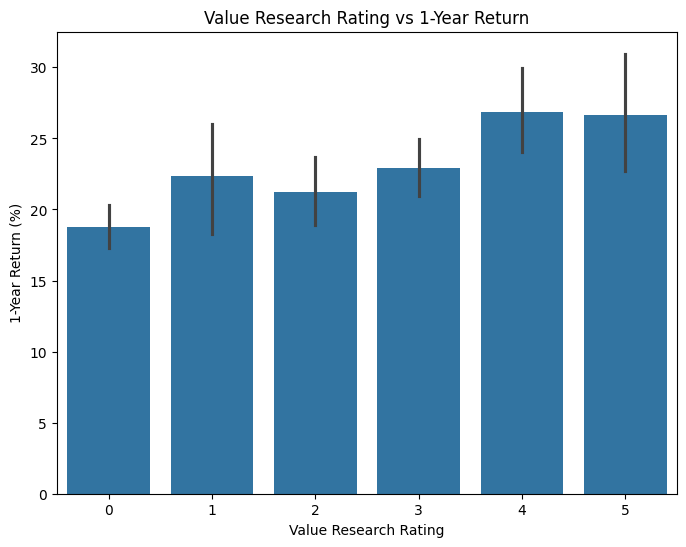

In [102]:
plt.figure(figsize=(8,6))
sns.barplot(x='Value Research rating', y='1 Year return', data=df)
plt.title('Value Research Rating vs 1-Year Return')
plt.xlabel('Value Research Rating')
plt.ylabel('1-Year Return (%)')
plt.show()

The Value Research rating shows a positive correlation with 1-year returns, with higher-rated funds (4 and 5) generally performing better. In contrast, the Morning Star rating doesn't show a clear pattern, as funds with a rating of 1 have the highest returns, while higher-rated funds (4 and 5) perform similarly to lower-rated ones. This suggests a stronger reliability of Value Research ratings in predicting fund performance

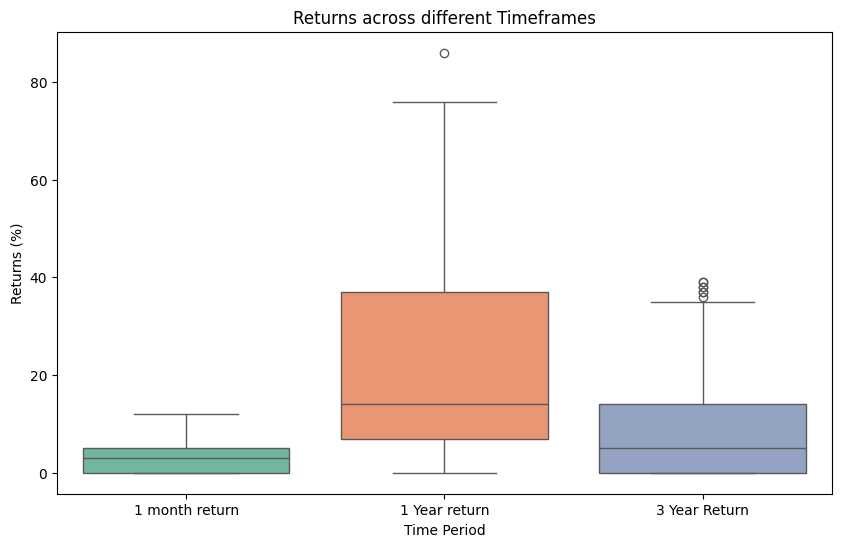

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['1 month return', '1 Year return', '3 Year Return']], palette='Set2')
plt.title('Returns across different Timeframes')
plt.xlabel('Time Period')
plt.ylabel('Returns (%)')
plt.show()

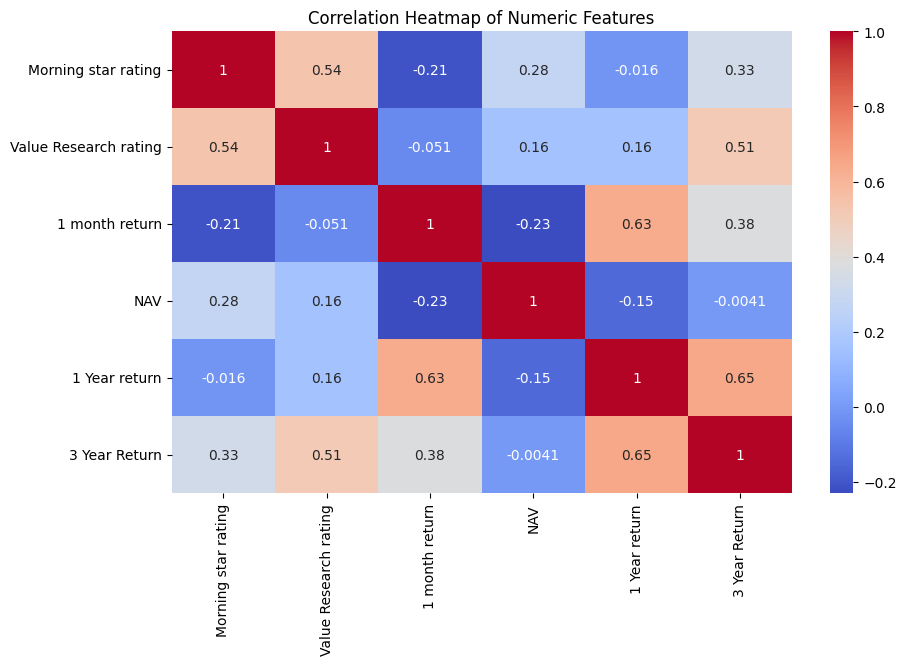

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Morning star rating', 'Value Research rating', '1 month return', 'NAV', '1 Year return', '3 Year Return', ]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

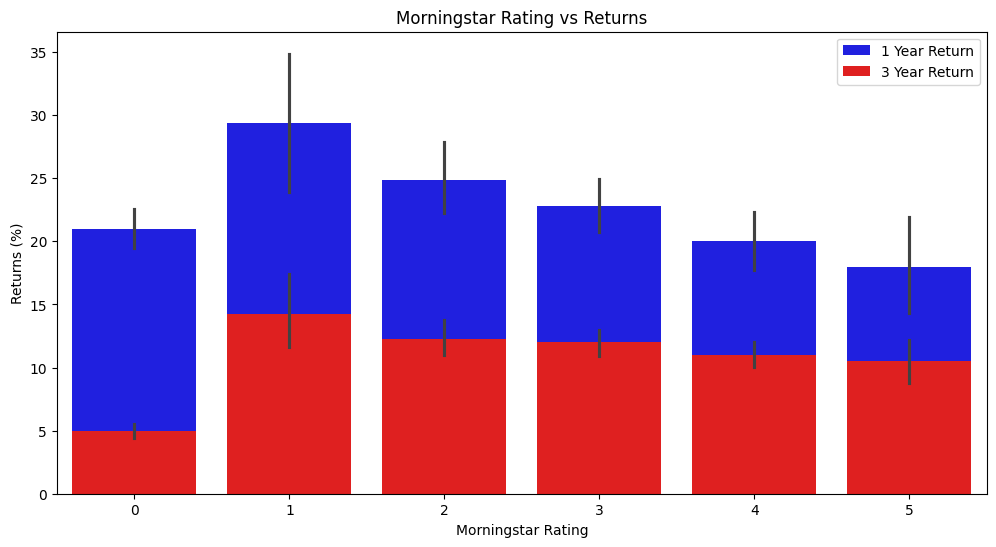

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(x='Morning star rating', y='1 Year return', data=df, color='b', label='1 Year Return')
sns.barplot(x='Morning star rating', y='3 Year Return', data=df, color='r', label='3 Year Return')
plt.title('Morningstar Rating vs Returns')
plt.xlabel('Morningstar Rating')
plt.ylabel('Returns (%)')
plt.legend()
plt.show()

In [ ]:
numerical_feature=['NAV', '1 month return', '1 Year return', '3 Year Return', 'Minimum investment']
categorical_columns = ['Fund Name', 'Fund Manager' , 'Category' ]

numerical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Apply ColumnTransformer for the feature preprocessing
transform = ColumnTransformer(transformers=[
    ('numerical', numerical_pipe, numerical_feature),
    ('categorical', categorical_pipe, categorical_columns)
], remainder='passthrough')

# Drop target from features
X = df.drop(columns=["Risk"])
y = df["Risk"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the target (if needed)
target_pipe = LabelBinarizer()
y_train = target_pipe.fit_transform(y_train).ravel()
y_test = target_pipe.transform(y_test).ravel()
# Fit and transform on training and test data
X_train = transform.fit_transform(X_train)
X_test = transform.transform(X_test)

# Create the final pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', transform),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

In [55]:
df.columns

Index(['Fund Name', 'Morning star rating', 'Value Research rating',
       '1 month return', 'NAV', '1 Year return', '3 Year Return',
       'Minimum investment', 'Fund Manager', 'AUM', 'Category', 'Risk'],
      dtype='object')